# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Preparation

1. Read the json file into pandas DataFrame.
2. Look at the shape and the first few rows (use transpose to see all of the columns).

In [23]:
## 1. read the json file into pandas data frame
data = pd.read_json('data/world_bank_projects.json')

## 2. look at the shape and the first 2 rows
print(data.shape)
data.head(2).T

(500, 50)


,0,1
_id,{'$oid': '52b213b38594d8a2be17c780'},{'$oid': '52b213b38594d8a2be17c781'}
approvalfy,1999,2015
board_approval_month,November,November
boardapprovaldate,2013-11-12T00:00:00Z,2013-11-04T00:00:00Z
borrower,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,GOVERNMENT OF TUNISIA
closingdate,2018-07-07T00:00:00Z,NaN
country_namecode,Federal Democratic Republic of Ethiopia!$!ET,Republic of Tunisia!$!TN
countrycode,ET,TN
countryname,Federal Democratic Republic of Ethiopia,Republic of Tunisia
countryshortname,Ethiopia,Tunisia


### Question 1: Find the 10 countries with most projects

1. Create a smaller data frame containing only the columns needed for the first question.
2. Make sure that every row of a data frame is a separate observation (project in our case).
3. Group by country names -> count accurances -> sort by the count column in descending order -> **look at 10 countries with most projects**.

In [9]:
## 1. subset data to include only columns needed for the first question
data1 = data[['countryname', 'project_name']]
print(data1.shape)
data1.head()

(500, 2)


,countryname,project_name
0,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
1,Republic of Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,Republic of Yemen,Gov't and Civil Society Organization Partnership
4,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...


In [10]:
## 2. Check that every row is a separate project
data1.project_name.nunique() == len(data1)

True

In [11]:
## 3. groupby countryname, count, sort, take the top 10
result = data1.groupby('countryname').agg({'countryname': ['count']})
result.columns = result.columns.droplevel(0)
result.sort_values('count', ascending=False).head(10)

,count
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


### Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

1. Seperate the column of interest, *mjtheme_namecode*. Look at random 2 elements of this Series to see that they are lists of dictionaries.
2. Iterate over the elements of the above Series, normalize every element and gather together as pandas DataFrame.
3. Group the newly created data frame by the theme -> count -> sort -> **look at the top 10 major project themes**

In [12]:
## 1. seperate the column of interest and look at its 2 random elements
data2 = data['mjtheme_namecode']
print(data2[np.random.randint(0,len(data2))])
print(data2[np.random.randint(0,len(data2))])

[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]
[{'code': '8', 'name': 'Human development'}, {'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}]


In [13]:
## 2. normalize each element and gather in a dataframe
df_normalized = pd.DataFrame()
for row in data2:
    df_normalized = df_normalized.append(json_normalize(row))
df_normalized.head()

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [14]:
## 3. look at the top 10 major project themes
result = df_normalized.groupby('name').agg({'name': ['count']})
result.columns = result.columns.droplevel(0)
result.sort_values('count', ascending=False).head(10)

,count
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


### Question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

1. Use the dataframe **df** that was created above to see that every code has two unique names.
2. Explore 1 or two codes to see that one of the unique values is the name of the theme, the other is an empty string.
3. Further confirm the observation made above by visualizing the data.
4. Fill in the empty strings with the corresponding theme names.
    * Create a dictionary to map the codes with the theme names.
    * Iterate over the full **mjtheme_namecode** column (the original data is in **data** dataframe) -> change the empty string with the theme name.

In [15]:
## 1. See that every code has 2 unique names
data3 = df_normalized.copy()
data3.groupby('code').nunique()

,code,name
code,,
1,1,2
10,1,2
11,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,2
7,1,2


In [16]:
## 2. Check one of the groups to see that one of the unique names is the actual name of the theme,
##    the other is an empty string
data3.groupby('code').get_group('1')

,code,name
0,1,Economic management
1,1,Economic management
1,1,Economic management
2,1,Economic management
3,1,Economic management
1,1,
2,1,Economic management
1,1,Economic management
0,1,Economic management
0,1,Economic management


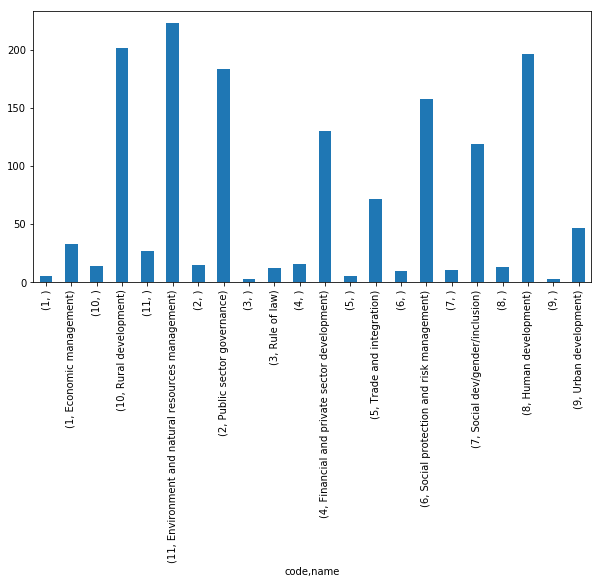

In [17]:
## 3. Visualize to see that indeed every code has one name which is the theme name, and one empty string
df_plot = data3.groupby(['code', 'name'])['name'].count()

fig = plt.figure(figsize=(10, 5))
df_plot.plot(kind='bar')

In [20]:
## 4. Fill in the missing values. First, create a dictionary to map the codes with their theme names
map_dict = dict(df_plot.index)
map_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [24]:
## Remember what the elements of mjtheme_namecode column look like
print(data.mjtheme_namecode[80])

[{'code': '2', 'name': 'Public sector governance'}, {'code': '10', 'name': ''}]


In [25]:
## Fill in the missing data
for element in data.mjtheme_namecode:
    for item in element:
        item['name'] = map_dict[item['code']]
        
## print the 81th element of mjtheme_namecode again to check that the change is properly done
print(data.mjtheme_namecode[80])

[{'code': '2', 'name': 'Public sector governance'}, {'code': '10', 'name': 'Rural development'}]
